In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import pandas as pd

df = pd.read_csv("/kaggle/input/imdb-movie-review-dataset/IMDB Dataset.csv")

print(df.head())
print(df['sentiment'].value_counts())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [11]:
import re
from sklearn.model_selection import train_test_split

# Convert sentiment to 0/1
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Function to clean text
def clean_text(text):
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z]", " ", text)  # keep only letters
    text = text.lower()  # lowercase
    return text

# Apply cleaning
df['review'] = df['review'].apply(clean_text)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df['review'], df['sentiment'], test_size=0.2, random_state=42
)


Preprocessing the text

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


Converting text to numerical features


Model: LogisticRegression
Accuracy: 0.8896 | Precision: 0.8784 | Recall: 0.9063 | F1-score: 0.8922

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



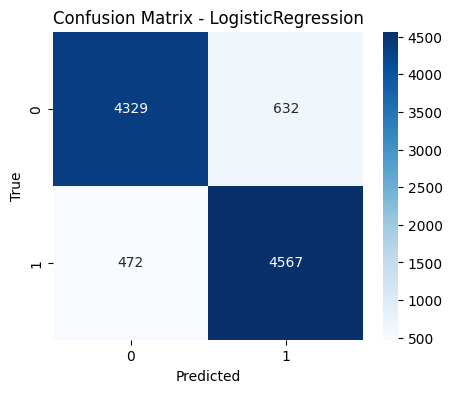

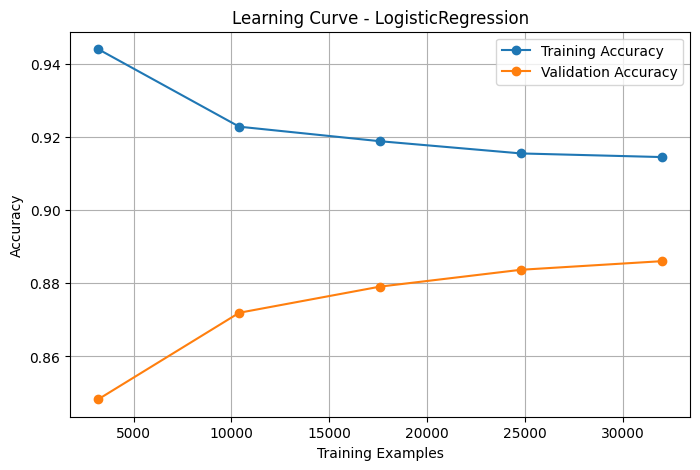


Model: LinearSVC
Accuracy: 0.8771 | Precision: 0.8696 | Recall: 0.8895 | F1-score: 0.8794

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



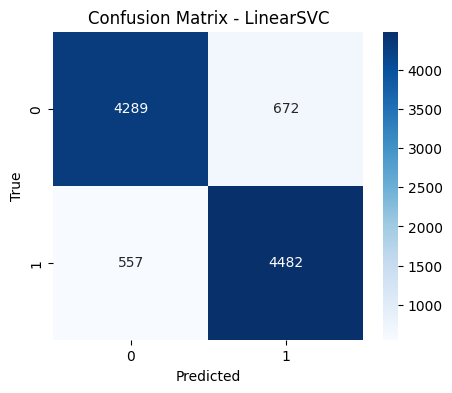

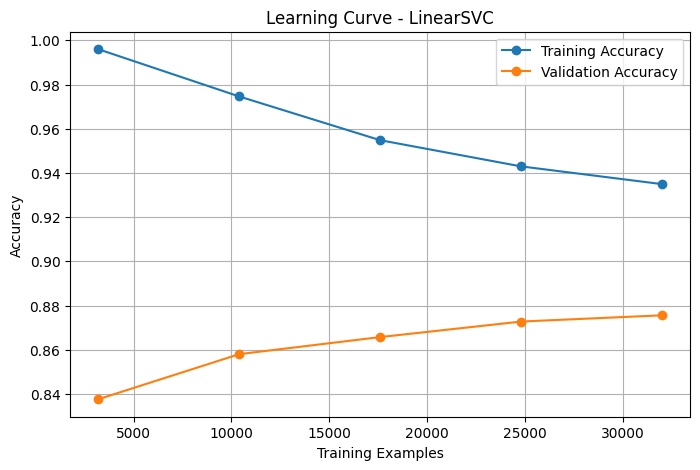


Model: MultinomialNB
Accuracy: 0.8525 | Precision: 0.8522 | Recall: 0.8557 | F1-score: 0.8539

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



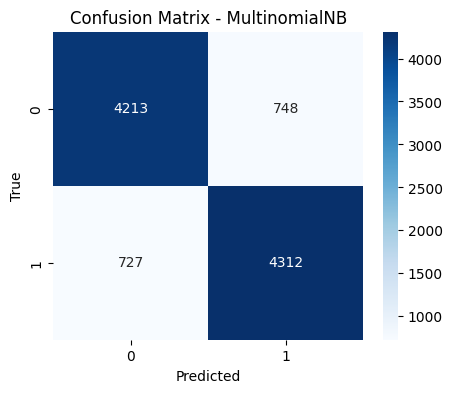

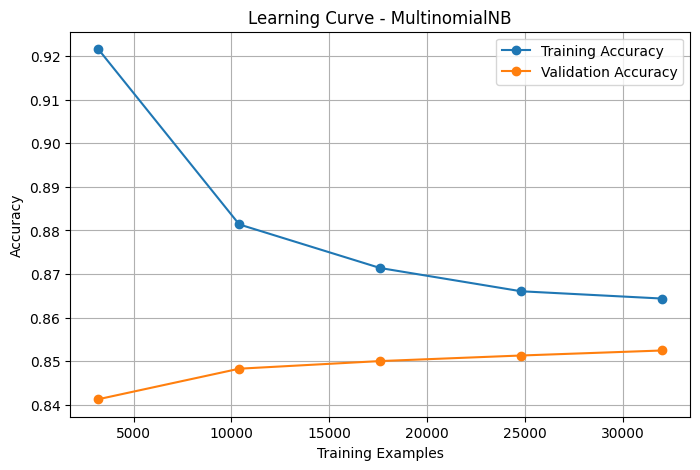


Model: RandomForestClassifier
Accuracy: 0.8509 | Precision: 0.8623 | Recall: 0.8379 | F1-score: 0.8499

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



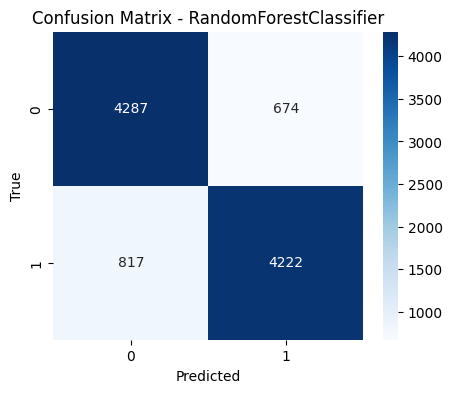

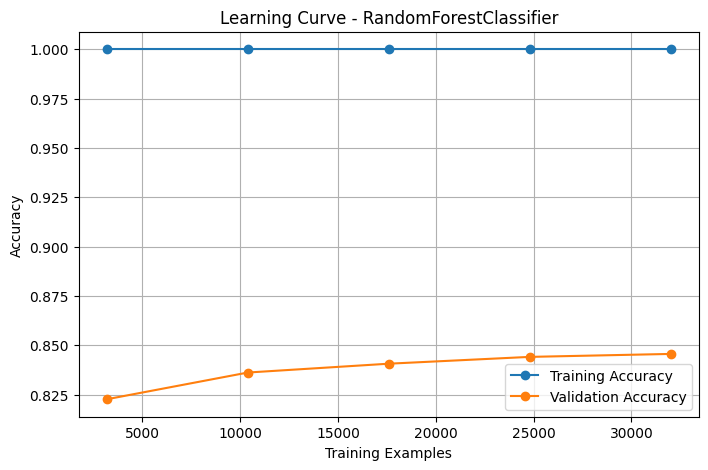


Model: GradientBoostingClassifier
Accuracy: 0.8086 | Precision: 0.7789 | Recall: 0.8660 | F1-score: 0.8201

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80      4961
           1       0.78      0.87      0.82      5039

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



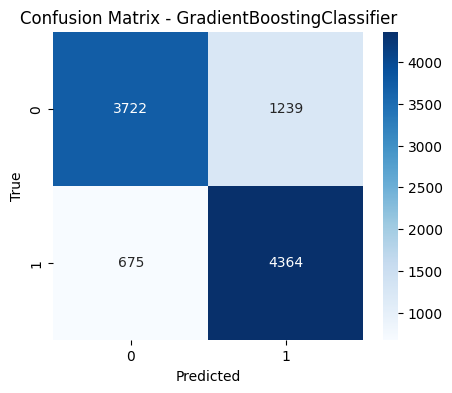

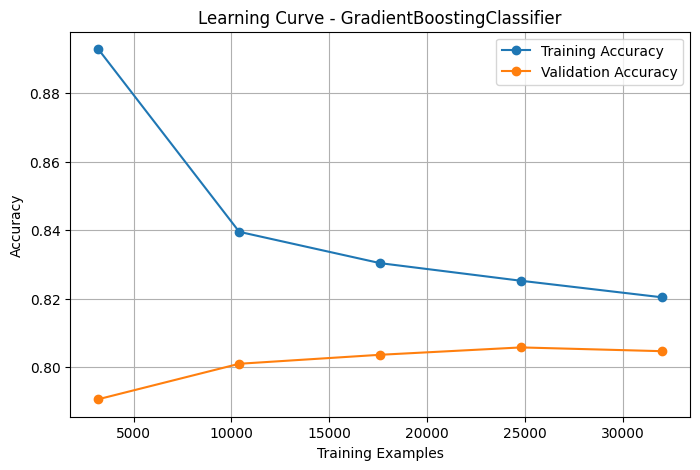

In [10]:
# Importing Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Function to Evaluate and Plot
def evaluate_and_plot(model, X_train, X_test, y_train, y_test):
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"\nModel: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-score: {f1:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Plot Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
    plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
    plt.title(f"Learning Curve - {model.__class__.__name__}")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Run for all models
for name, model in models.items():
    evaluate_and_plot(model, X_train_tfidf, X_test_tfidf, y_train, y_test)
